# Basic way to click points on images

In [11]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import matplotlib.pyplot as plt
import os
import sys
import imageio
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
def open(image):
    fig1 = plt.figure(figsize=(10,6))
    ax = fig1.add_subplot(111)
    ax.imshow(image)
    text=ax.text(10,10, "", va="top", ha="left", color='w')

    landmarks = []
    timestamp = [0]
    def onclick(event):
        if event.button==3:
            landmarks.append([event.xdata, event.ydata])
            timestamp.append(timestamp[-1]+1)
            l = np.float32(landmarks)
            ax.plot(l[:,0], l[:,1], 'r.')
            
            text.set_text("{}\n{}".format(len(l), np.around(l, 1)))

    cid = fig1.canvas.mpl_connect('button_press_event', onclick)
    plt.show() # show() must be called after mpl_connect!
    
    return landmarks, timestamp[:-1]

In [13]:
views = ["cam0", 'cam1', 'cam2']
image1 = imageio.imread("../scripts/robopen_02/camera0.png")
image2 = imageio.imread("../scripts/robopen_02/camera1.png")
image3 = imageio.imread("../scripts/robopen_02/camera2.png")

/tmp/ipykernel_850259/3636096046.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image1 = imageio.imread("../scripts/robopen_02/camera0.png")
/tmp/ipykernel_850259/3636096046.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image2 = imageio.imread("../scripts/robopen_02/camera1.png")
/tmp/ipykernel_850259/3636096046.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image3 =

<IPython.core.display.Javascript object>


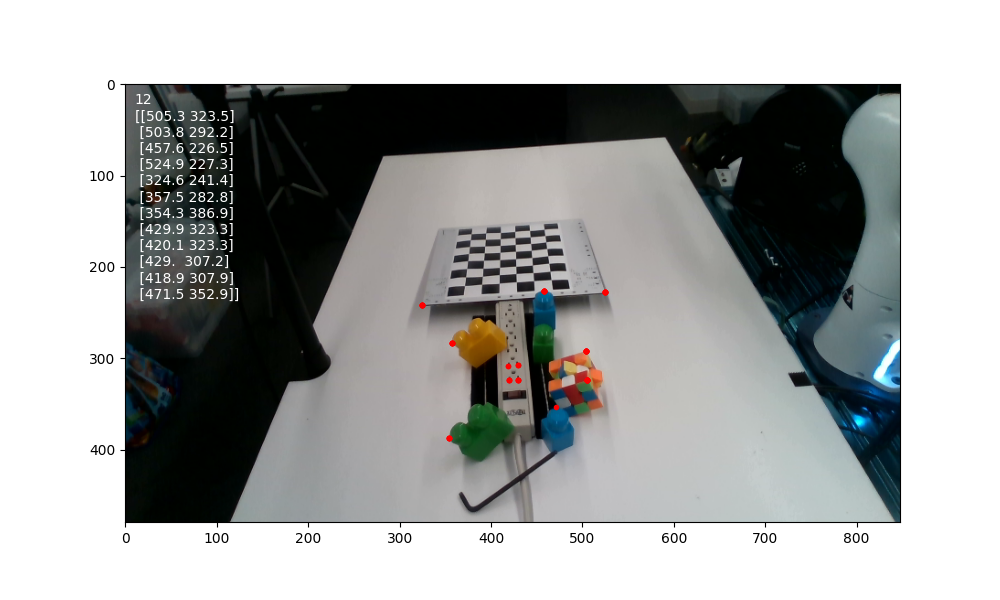

In [17]:
landmarks1, timestamp1 = open(image1)

In [18]:
landmarks1, timestamp1

([[505.3290909090909, 323.5025219941349],
  [503.76434855467113, 292.20767490573945],
  [457.60444909928776, 226.48849602010898],
  [524.888370339338, 227.27086719731886],
  [324.60134897360706, 241.3535483870968],
  [357.46093841642227, 282.8192207792208],
  [354.33145370758274, 386.8745873481357],
  [429.8696448838133, 323.27454208129535],
  [420.0849248363702, 323.27454208129535],
  [429.04663104804706, 307.1800492929777],
  [418.8961270735967, 307.9116171469921],
  [471.54193548387104, 352.86870967741936]],
 [])

<IPython.core.display.Javascript object>


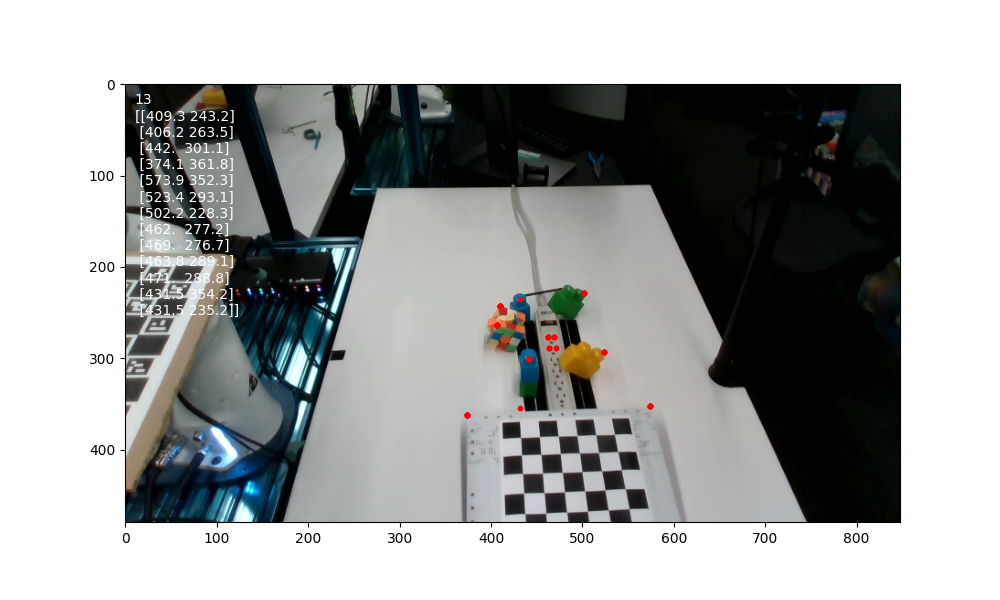

In [19]:
landmarks2, timestamp2 = open(image2)

In [20]:
landmarks2, timestamp2
landmarks2 = 

([[409.30289624354145, 243.18444211702268],
  [406.2199748638459, 263.5317232230135],
  [441.9818628683145, 301.14336405529946],
  [374.06475454164604, 361.81473130974587],
  [573.9308979192851, 352.31985895824596],
  [523.3709872922777, 293.12776846809095],
  [502.2323312785526, 228.25085353202857],
  [462.044499244646, 277.23164278187943],
  [468.9630552759628, 276.6911305919328],
  [463.7741382524752, 289.1229109607052],
  [471.01700159776, 288.7986036467372],
  [431.4999301773496, 354.16961178606334],
  [431.4999301773496, 235.16884652981423]],
 [])

<IPython.core.display.Javascript object>


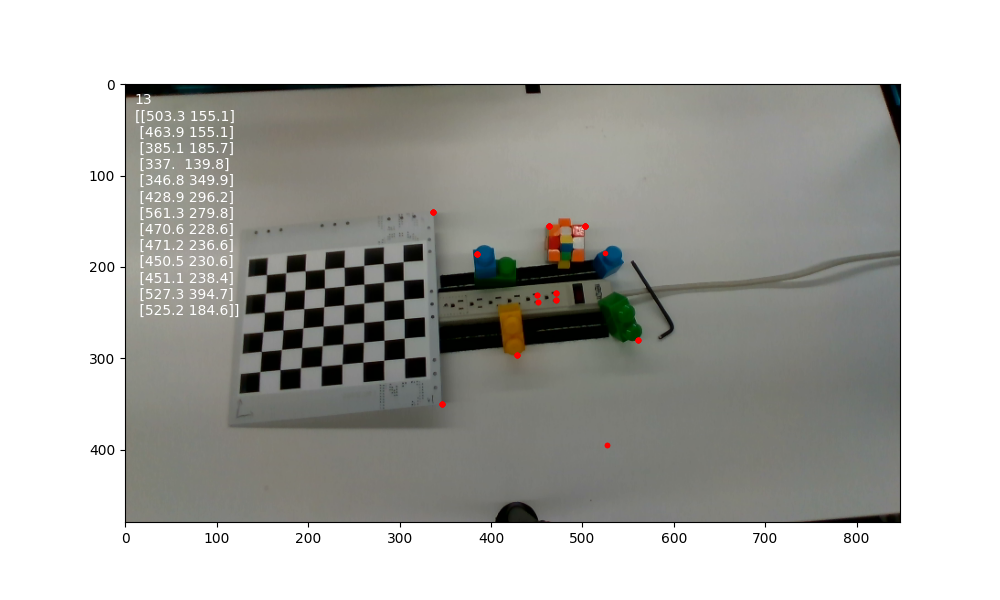

In [22]:
landmarks3, timestamp3 = open(image3)

In [34]:
landmarks3, timestamp3
print(landmarks3)

landmarks3_np = np.array(landmarks3)
timestamps3_np = np.array(timestamp3)
landmarks3_np = np.concatenate([landmarks3_np[:-2], landmarks3_np[-1:]])
timestamps3_np = np.concatenate([timestamps3_np[:-2], timestamps3_np[-1:]])
print(landmarks3_np)

print(landmarks2)
landmarks2_np = np.array(landmarks2)
timestamps2_np = np.array(timestamp2)
landmarks2_np = np.concatenate([landmarks2_np[:-2], landmarks2_np[-1:]])
timestamps2_np = np.concatenate([timestamps2_np[:-2], timestamps2_np[-1:]])
print(landmarks2_np)

[[503.27354838709687, 155.09322580645164], [463.8825806451613, 155.09322580645164], [385.10064516129034, 185.73064516129034], [336.9561290322581, 139.7745161290323], [346.803870967742, 349.85967741935485], [428.8683870967742, 296.2441935483871], [561.265806451613, 279.8312903225807], [470.63114369501466, 228.62956011730205], [471.22797653958946, 236.5873313782991], [450.5377712609971, 230.61900293255133], [451.13460410557184, 238.37782991202346], [527.3458064516129, 394.72161290322583], [525.1574193548388, 184.63645161290322]]
[[503.27354839 155.09322581]
 [463.88258065 155.09322581]
 [385.10064516 185.73064516]
 [336.95612903 139.77451613]
 [346.80387097 349.85967742]
 [428.8683871  296.24419355]
 [561.26580645 279.83129032]
 [470.6311437  228.62956012]
 [471.22797654 236.58733138]
 [450.53777126 230.61900293]
 [451.13460411 238.37782991]
 [525.15741935 184.63645161]]
[[409.30289624354145, 243.18444211702268], [406.2199748638459, 263.5317232230135], [441.9818628683145, 301.14336405529

In [35]:
ids=np.arange(0, len(landmarks2_np))
ids=list(ids)
landmarks2_np=landmarks2_np.tolist()
landmarks3_np=landmarks3_np.tolist()
landmarks = {
    views[0]:{"landmarks":landmarks1, "ids":ids},  
    views[1]:{"landmarks":landmarks2_np, "ids": ids}, 
    views[2]:{"landmarks":landmarks3_np, "ids": ids}, 
}
landmarks

{'cam0': {'landmarks': [[505.3290909090909, 323.5025219941349],
   [503.76434855467113, 292.20767490573945],
   [457.60444909928776, 226.48849602010898],
   [524.888370339338, 227.27086719731886],
   [324.60134897360706, 241.3535483870968],
   [357.46093841642227, 282.8192207792208],
   [354.33145370758274, 386.8745873481357],
   [429.8696448838133, 323.27454208129535],
   [420.0849248363702, 323.27454208129535],
   [429.04663104804706, 307.1800492929777],
   [418.8961270735967, 307.9116171469921],
   [471.54193548387104, 352.86870967741936]],
  'ids': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
 'cam1': {'landmarks': [[409.30289624354145, 243.18444211702268],
   [406.2199748638459, 263.5317232230135],
   [441.9818628683145, 301.14336405529946],
   [374.06475454164604, 361.81473130974587],
   [573.9308979192851, 352.31985895824596],
   [523.3709872922777, 293.12776846809095],
   [502.2323312785526, 228.25085353202857],
   [462.044499244646, 277.23164278187943],
   [468.9630552759628, 276.

In [36]:
from multiview_calib import utils
utils.json_write("../examples/simple_box/landmarks_test.json", landmarks)

ValueError: Unable to write JSON ../examples/simple_box/landmarks_test.json